# Time aggregation by week

In [1]:
import pandas as pd
import altair as alt
from altair import datum

## Read in library web site page views data

and change the timestamp data type to `datetime`

In [2]:
pageviews = pd.read_csv('data/pageviews_2012_small.csv')
pageviews['timestamp'] = pd.to_datetime(pageviews.timestamp)

,timestamp,visitors,city,region,country,longitude,latitude,lcc_description
0,2012-01-01 16:00:00,1,Montreal,Quebec,Canada,-73.5542,45.5089,Military Science
1,2012-01-01 13:00:00,1,Durham,North Carolina,United States,-78.8986,35.9940,History Of The Americas
2,2012-01-01 10:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences
3,2012-01-01 18:00:00,1,Plymouth,England,United Kingdom,-4.1427,50.3704,NaN
4,2012-01-01 09:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences


## Change ISO_time to a true date and time data type

## MaxRowsError

Can take off limit for number of rows, but that's not a great idea because the notebook will have a Vega-Lite JSON specification (text) embedded for every output pane, which also includes the data, so you end up with huge notebooks!

Instead, we can specify that the outputs should just refer to a JSON file on your local drive and load in the data from there for each plot.

See the Altair tutorial notebook `03-Binning-and-aggregation` for more details.

In [6]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [20]:
pageviews.head()

,timestamp,visitors,city,region,country,longitude,latitude,lcc_description
0,2012-01-01 16:00:00,1,Montreal,Quebec,Canada,-73.5542,45.5089,Military Science
1,2012-01-01 13:00:00,1,Durham,North Carolina,United States,-78.8986,35.9940,History Of The Americas
2,2012-01-01 10:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences
3,2012-01-01 18:00:00,1,Plymouth,England,United Kingdom,-4.1427,50.3704,NaN
4,2012-01-01 09:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences


In [21]:
pt = pageviews.groupby([pd.Grouper(key='timestamp', freq='W',label='left')])['visitors'].sum().reset_index().sort_values('timestamp')
pt['visitors_day'] = pt['visitors']/7.0
pt.head()

,timestamp,visitors,visitors_day
0,2011-12-25,12,1.714286
1,2012-01-01,145,20.714286
2,2012-01-08,208,29.714286
3,2012-01-15,246,35.142857
4,2012-01-22,255,36.428571


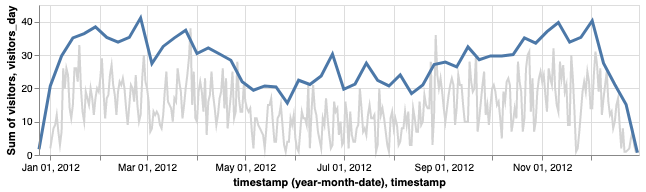

In [22]:
weekly_chart = alt.Chart(pt).mark_line(
    strokeWidth=3
).encode(
    x = 'timestamp:T',
    y = 'visitors_day:Q'
).properties(
    width=600,
    height=150
)

daily_chart = alt.Chart(pageviews).mark_line(
    color='lightgray'
).encode(
    x = 'yearmonthdate(timestamp):T',
    y = 'sum(visitors):Q',
    tooltip = 'yearmonthdate(timestamp):T'
).transform_filter(
    datum.city == 'Durham'
).properties(
    width=600,
    height=150
)

daily_chart + weekly_chart